In [481]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick

import glob

In [457]:
results_path = '/mnt/d/research/transport_protocols/results/**/*'

results_files = []
for result_file in glob.glob(results_path, recursive=True):
    if '.txt' in result_file:
        results_files.append(result_file)
print(results_files)
# results_files = ['20230512_1646_oneplus_iedge_4g_tcp_480p.txt']

['/mnt/d/research/transport_protocols/results/baseline/20230515_1115_oneplus_iedge_5g_tcp_480p.txt', '/mnt/d/research/transport_protocols/results/baseline/20230515_1126_oneplus_iedge_5g_tcp_1080p.txt', '/mnt/d/research/transport_protocols/results/baseline/20230515_1137_oneplus_iedge_4g_tcp_480p.txt', '/mnt/d/research/transport_protocols/results/baseline/20230515_1149_oneplus_iedge_5g_udp_2k.txt', '/mnt/d/research/transport_protocols/results/baseline/20230515_1417_oneplus_iedge_5g_udp_144p.txt', '/mnt/d/research/transport_protocols/results/baseline/20230515_1429_oneplus_iedge_4g_tcp_1080p.txt', '/mnt/d/research/transport_protocols/results/baseline/20230515_1512_oneplus_iedge_5g_udp_360p.txt', '/mnt/d/research/transport_protocols/results/baseline/20230515_1522_oneplus_iedge_5g_udp_4k.txt', '/mnt/d/research/transport_protocols/results/baseline/20230515_1534_oneplus_iedge_5g_tcp_2k.txt', '/mnt/d/research/transport_protocols/results/baseline/20230515_1545_oneplus_iedge_4g_udp_144p.txt', '/m

In [458]:
useful_columns = ['QoS_Uplink Delay [ms]', 'QoS_Downlink Delay [ms]', 'Primary Pkt.Size [B]', 'Secondary Pkt.Size [B]',
                      'Primary Load [kb/s]', 'Secondary Load [kb/s]', 'QoS_Uplink Total Pkt loss', 
                      'QoS_Downlink Total Pkt loss', 'QoS_Uplink Jitter(MA) [ms]', 'QoS_Downlink Jitter(MA) [ms]']

In [459]:
combined_results = pd.DataFrame()
for results_file in results_files:
    print(results_file)
    with open(f'{results_file}') as f:
        results = [line for line in f.readlines()]
    
    general_col_names = pd.DataFrame([results[18]]).iloc[:, 0].str.split('\t',expand=True)
    data_col_names = pd.DataFrame([results[19]]).iloc[:, 0].str.split('\t',expand=True)

    new_cols = []
    general_col_prefix = ''
    for i in general_col_names:
        curr_general_col_name = general_col_names[i][0]
        curr_data_col_name = data_col_names[i][0]
        if len(curr_general_col_name) > 1:
            general_col_prefix = curr_general_col_name.split(' ')[0].replace(',', '')
            if 'QoS' in general_col_prefix:
                direction = curr_general_col_name.split(' ')[1]
                general_col_prefix = f'{general_col_prefix}_{direction}'
        new_col_name = f'{general_col_prefix} {curr_data_col_name}'
        new_cols.append(new_col_name)
    new_cols.append(' ')
    
    df = pd.DataFrame(results[18:])
    df = df.iloc[:, 0].str.split('\t',expand=True)
    
    df.columns = new_cols
    df = df.drop(df.index[[0, 1]])
    
    # for every file read in, I want to add the following columns:
    # datetime, network type, primary device, secondary device, protocol, resolution
    
    # read the file name and select out this data
    file_name_split = results_file.split('_')[1:]
    file_name_split[0] = file_name_split[0].split('/')[-1]
    file_name_split[-1] = file_name_split[-1].split('.')[0]
        
    df_len = df.size
        
    if len(file_name_split) == 7:
        file_name_split.append('')
    
    new_col_series = pd.Series([file_name_split])
#     new_col = new_col_series.repeat(df_len)
    new_col_df = pd.DataFrame(new_col_series)
    
    new_col_df_split = pd.DataFrame(new_col_df[0].to_list(), columns=['Date', 'Time', 'Primary Device', 
                                                                      'Secondary Device', 'Network Type', 'Protocol', 
                                                                      'Resolution', 'Buffer'])
    
#     df = pd.concat([new_col_df_split, df], axis=1)
    
    # for every file, reduce the results down
    useful_df = df[useful_columns]
    useful_df = useful_df.apply(pd.to_numeric, errors='coerce')

    median = pd.DataFrame(useful_df.median()).transpose()
    std = useful_df.std()
        
    analysed_data = pd.concat([new_col_df_split, median], axis=1)    
    combined_results = pd.concat([combined_results, analysed_data], axis=0)


/mnt/d/research/transport_protocols/results/baseline/20230515_1115_oneplus_iedge_5g_tcp_480p.txt
/mnt/d/research/transport_protocols/results/baseline/20230515_1126_oneplus_iedge_5g_tcp_1080p.txt
/mnt/d/research/transport_protocols/results/baseline/20230515_1137_oneplus_iedge_4g_tcp_480p.txt
/mnt/d/research/transport_protocols/results/baseline/20230515_1149_oneplus_iedge_5g_udp_2k.txt
/mnt/d/research/transport_protocols/results/baseline/20230515_1417_oneplus_iedge_5g_udp_144p.txt
/mnt/d/research/transport_protocols/results/baseline/20230515_1429_oneplus_iedge_4g_tcp_1080p.txt
/mnt/d/research/transport_protocols/results/baseline/20230515_1512_oneplus_iedge_5g_udp_360p.txt
/mnt/d/research/transport_protocols/results/baseline/20230515_1522_oneplus_iedge_5g_udp_4k.txt
/mnt/d/research/transport_protocols/results/baseline/20230515_1534_oneplus_iedge_5g_tcp_2k.txt
/mnt/d/research/transport_protocols/results/baseline/20230515_1545_oneplus_iedge_4g_udp_144p.txt
/mnt/d/research/transport_protocol

In [460]:
pd.pandas.set_option('display.max_columns', None)
df.head()


,General Meas. time [s],General Timestamp [s],General Ctrl pk num,General True Avg.Per. [ms],Primary Latitude,Primary Longitude,Primary Altitude,Primary Position mode,Primary Position age,Primary Position accuracy [m],Primary RSSI [dBm],Primary RSRP [dBm],Primary RSRQ [dB],Primary SINR [dB],Primary Cell ID,Primary BS MAC address,Primary Network type,Primary Dropped by If [pkts],Primary Dropped by Pcap [pkts],Primary Malformed [pkts],Primary Short [pkts],Primary Load [kb/s],Primary Load [pkts/s],Primary Total bytes,Primary Total pkts,Primary Pkt.Size [B],Primary Protocol,Primary Duplicates,Primary Load [kb/s],Primary Load [pkts/s],Primary Total bytes,Primary Total pkts,Primary Pkt.Size [B],Primary Protocol,Primary Duplicates,Secondary Latitude,Secondary Longitude,Secondary Altitude,Secondary Position accuracy[m],Secondary RSSI [dBm],Secondary RSRP [dBm],Secondary RSRQ [dB],Secondary SINR [dB],Secondary Cell ID,Secondary BS MAC address,Secondary Network type,Secondary Dropped by If [pkts],Secondary Dropped by Pcap [pkts],Secondary Malformed [pkts],Secondary Short [pkts],Secondary Load [kb/s],Secondary Load [pkts/s],Secondary Total bytes,Secondary Total pkts,Secondary Pkt.Size [B],Secondary Protocol,Secondary Duplicates,Secondary Load [kb/s],Secondary Load [pkts/s],Secondary Total bytes,Secondary Total pkts,Secondary Pkt.Size [B],Secondary Protocol,Secondary Duplicates,QoS_Uplink Pkt loss,QoS_Uplink Total Pkt loss,QoS_Uplink Delay samples,QoS_Uplink Delay [ms],QoS_Uplink Delay(max) [ms],QoS_Uplink Delay(min) [ms],QoS_Uplink Jitter(MA) [ms],QoS_Uplink Jitter(abs.) [ms],QoS_Uplink Jitter(max) [ms],QoS_Uplink Exceeded delay th. [pkts],QoS_Uplink Exceeded jitter th. [pkts],QoS_Uplink GQoSM,QoS_Uplink PSQA,QoS_Uplink Conn. break dur. [s],QoS_Uplink Conn. break length [pkts],QoS_Uplink Conn. break count,QoS_Uplink Max Conn break [s],QoS_Uplink Sent not found [pkts],QoS_Downlink Pkt loss,QoS_Downlink Total Pkt loss,QoS_Downlink Delay samples,QoS_Downlink Delay [ms],QoS_Downlink Delay(max) [ms],QoS_Downlink Delay(min) [ms],QoS_Downlink Jitter(MA) [ms],QoS_Downlink Jitter(abs.) [ms],QoS_Downlink Jitter(max) [ms],QoS_Downlink Exceeded delay th. [pkts],QoS_Downlink Exceeded jitter th. [pkts],QoS_Downlink GQoSM,QoS_Downlink PSQA,QoS_Downlink Conn. break dur .[s],QoS_Downlink Conn. break length [pkts],QoS_Downlink Conn. break count,QoS_Downlink Max Conn break [s],QoS_Downlink Sent not found [pkts]\n,
2,1,1684513556.329562,1,1000.000000,N/A,N/A,N/A,None,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,0,0,0,0,6.440000,8.000000,805,8,100,6,0,6.144000,7.000000,768,7,109,6,0,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,0,0,0,0,3.200000,3.000000,400,3,133,17,0,4.144000,6.000000,518,6,86,17,0,0.000000,0.000000,1,9.178000,9.178000,9.178000,0.000000,0.000000,0.000000,0,0,N/A,N/A,0.000000,0,0,N/A,N/A,0.000000,0.000000,2,3.641000,4.775000,2.506000,2.268000,1.134000,2.268000,0,0,N/A,N/A,0.000000,0,0,N/A,N/A,\n
3,2,1684513557.329515,2,1000.000000,N/A,N/A,N/A,None,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,0,0,0,0,8.976000,7.000000,1927,15,160,6,0,4.824000,5.000000,1371,12,120,6,0,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,0,0,0,0,4.216000,3.000000,927,6,175,6,0,3.040000,5.000000,898,11,76,6,0,0.750000,0.750000,2,8.539000,8.579000,8.500000,0.566000,0.338000,0.599000,0,0,N/A,N/A,0.463121,3,1,0.463121,0,0.000000,0.000000,3,4.806000,8.965000,0.900000,2.699000,4.587000,8.064000,0,0,N/A,N/A,0.000000,0,0,N/A,2,\n
4,3,1684513558.329543,3,1000.000000,N/A,N/A,N/A,None,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,0,0,0,0,15.584000,10.000000,3875,25,194,6,0,6.960000,7.000000,2241,19,124,6,0,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,0,0,0,0,5.472000,5.000000,1611,11,136,17,0,5.472000,8.000000,1582,19,85,17,0,0.500000,0.625000,5,8.093000,8.663000,7.219000,0.502000,0.321000,1.244000,0,0,N/A,N/A,0.052567,1,2,0.052567,0,0.000000,0.000000,5,5.834000,10.004000,1.281000,3.290000,4.872000,8.723000,0,0,N/A,N/A,0.000000,0,0,N/A,0,\n
5,4,1684513559.329523,4,1000.000000,N/A,N/A,N/A,None,N/A,N/A,N/A,N/A,N/

In [461]:
print(combined_results)

       Date  Time Primary Device Secondary Device Network Type Protocol  \
0  20230515  1115        oneplus            iedge           5g      tcp   
0  20230515  1126        oneplus            iedge           5g      tcp   
0  20230515  1137        oneplus            iedge           4g      tcp   
0  20230515  1149        oneplus            iedge           5g      udp   
0  20230515  1417        oneplus            iedge           5g      udp   
0  20230515  1429        oneplus            iedge           4g      tcp   
0  20230515  1512        oneplus            iedge           5g      udp   
0  20230515  1522        oneplus            iedge           5g      udp   
0  20230515  1534        oneplus            iedge           5g      tcp   
0  20230515  1545        oneplus            iedge           4g      udp   
0  20230515  1602        oneplus            iedge           4g      tcp   
0  20230515  1613        oneplus            iedge           4g      udp   
0  20230516  1053        

tcp_5g_Default QoS_Downlink Delay [ms] 15.806000000000001 10.342540463778613 10.376999999999999 42.457499999999996
0    11.8930
0    11.0320
0    17.0215
0    10.3770
0    19.1425
0    15.8060
0    42.4575
Name: QoS_Downlink Delay [ms], dtype: float64


tcp_5g_Default QoS_Downlink Jitter(MA) [ms] 5.425 2.4758100797557976 3.877 11.5045
0     3.8770
0     4.5430
0     5.4250
0     5.1345
0     7.2005
0     8.4220
0    11.5045
Name: QoS_Downlink Jitter(MA) [ms], dtype: float64


tcp_5g_Default Secondary Load [kb/s] 407.58 Secondary Load [kb/s]    2972.399205
Secondary Load [kb/s]      26.713257
dtype: float64 Secondary Load [kb/s]    730.280
Secondary Load [kb/s]     19.296
dtype: float64 Secondary Load [kb/s]    8941.376
Secondary Load [kb/s]      84.880
dtype: float64
   Secondary Load [kb/s]  Secondary Load [kb/s]
0                730.280                 27.776
0               1051.472                 30.800
0               1404.152                 32.656
0               3806.400      

/home/jacky/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/jacky/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/jacky/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/jacky/.local/lib/python3.10/site-package

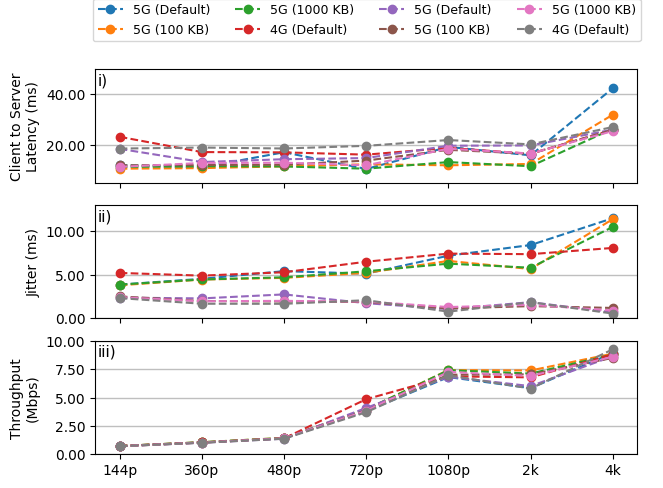

In [550]:
# analysing for uplink and downlink delay 

useful_columns = ['QoS_Downlink Delay [ms]', 
                  'QoS_Downlink Jitter(MA) [ms]',
                  'Secondary Load [kb/s]']
results = {
    'protocols': ['tcp', 'udp'],
    'network_type': ['5g', '4g'],
    'graphs': useful_columns,
    'buffer': ['Default', '100kb', '1000kb']
}

# combined_results.plot(x='Resolution', y=['QoS_Uplink Delay [ms]', 'QoS_Downlink Delay [ms]'])

# plot data with resolution on the x-axis, and delays in the y-axis

# I should filter the data, I need to filter also by the network type, protocol, and uplink/downlink
# results_tcp = combined_results[combined_results['Protocol'].str.contains('tcp')]
# results_udp = combined_results[combined_results['Protocol'].str.contains('udp')]

# tcp_5g = results_tcp[results_tcp['Network Type'].str.contains('5g')]
# tcp_4g = results_tcp[results_tcp['Network Type'].str.contains('4g')]

# udp_5g = results_udp[results_udp['Network Type'].str.contains('5g')]
# udp_4g = results_udp[results_udp['Network Type'].str.contains('4g')]

plt.rc('font', size=10)

fig, axs = plt.subplots(len(results['graphs']), 1, figsize=[7, 5], sharex=True)

resolution_order = ['144p', '360p', '480p', '720p', '1080p', '2k', '4k']

combined_results['Resolution'] = pd.Categorical(combined_results['Resolution'], categories=resolution_order, ordered=True)
combined_results.sort_values('Resolution', inplace=True)

combined_results = combined_results.replace('', 'Default')                   # to get rid of empty values


valid_plots = ['tcp_5g_Default', 'tcp_4g_Default', 'udp_5g_Default', 'udp_4g_Default',
               'tcp_5g_100kb', 'tcp_5g_1000kb', 'udp_5g_100kb', 'udp_5g_1000kb']
# valid_plots = ['udp_5g_Default', 'udp_4g_Default', 'udp_5g_100kb', 'udp_5g_1000kb']
# valid_plots = ['tcp_5g_Default', 'tcp_4g_Default', 'tcp_5g_100kb', 'tcp_5g_1000kb']

for protocol in results['protocols']:
    for network in results['network_type']:
        curr_results_protocol = combined_results[combined_results['Protocol'].str.contains(protocol)]
        curr_results_network = curr_results_protocol[curr_results_protocol['Network Type'].str.contains(network)]
        
        for buffer_size in results['buffer']:
            curr_results_buffer = curr_results_network[curr_results_network['Buffer'].str.contains(buffer_size)]
            
            curr_graph = f'{protocol}_{network}_{buffer_size}'
            if curr_graph not in valid_plots:
                continue
                
            for i in range(len(results['graphs'])):
                curr_graph_key = results['graphs'][i]

                curr_y_plot = curr_results_buffer[curr_graph_key]
                print(curr_graph, curr_graph_key, np.median(curr_y_plot), np.std(curr_y_plot), np.min(curr_y_plot), np.max(curr_y_plot))
                print(curr_y_plot)
                print("\n")

                if curr_graph_key == 'Primary Pkt.Size [B]' or curr_graph_key == 'Primary Load [kb/s]':
                    curr_y_plot = curr_results_buffer[curr_graph_key].iloc[:,1] / 1000
                elif curr_graph_key == 'Secondary Pkt.Size [B]'  or curr_graph_key == 'Secondary Load [kb/s]':
                    curr_y_plot = curr_results_buffer[curr_graph_key].iloc[:,0] / 1000

                if 'kb' in buffer_size:
                    old_buffer_size = buffer_size.split('kb')
                    buffer_size = f'{old_buffer_size[0]} KB'
                    
                axs[i].plot(curr_results_buffer['Resolution'], curr_y_plot, '--o', label=f'{network.upper()} ({buffer_size})')

    #             axs[i].set_xticklabels(resolution_order)

                axs[i].set_ylabel(curr_graph_key)
                if i != 3:
                    axs[i].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
                axs[i].grid(color='grey', linestyle='-', linewidth=1, which="both", alpha=0.5, axis="y")

#                 axs[i].legend()

axs[0].set_ylabel('Client to Server\nLatency (ms)')
axs[1].set_ylabel('Jitter (ms)')
axs[2].set_ylabel('Throughput\n(Mbps)')

axs[0].set_ylim([5,50])
axs[1].set_ylim([0,13])
axs[2].set_ylim([0,10])

handles, labels = axs[0].get_legend_handles_labels()

# handles = [handles[2], handles[3], handles[4], handles[0], handles[1]]
# labels = [labels[2], labels[3], labels[4], labels[0], labels[1]]
plt.figlegend(handles, labels, loc = (0.14, 0.915), ncol=4, prop={'size': 9})

for i, label in enumerate(('i)', 'ii)', 'iii)')):
            ax = fig.add_subplot(3, 1, i+1, facecolor='white')
            ax.patch.set_alpha(0.0)
            ax.axis('off')
            ax.text(0.005, 0.97, label, transform=ax.transAxes, fontsize=11, va='top')

fig.align_ylabels(axs[:])
# plt.savefig(f'graphs/udp.pdf', bbox_inches='tight', pad_inches=0.01)

# axs.legend()
